In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np

In [72]:
def graph(algos, save=False):
    for algo in algos:
        df,label = algo
        x = df['sample_size']*1000
        
        X_Y_Spline = make_interp_spline(x, df['duration'])
        X_ = np.linspace(x.min(), x.max(), 500)
        Y_ = X_Y_Spline(X_)
        plt.plot(X_, Y_, label=label)
        plt.scatter(x, df['duration'])
    plt.legend()
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('#tips')
    plt.ylabel('Time taken (minutes)')
    if save:
        plt.savefig('Time complexity benchmarks.png')
    else:
        plt.show()
    

## TreeTime

In [73]:
# datapoints = [(id, time (minutes), # samples (thousands))]
treetime_datapoints = [('49921957', 17/60, 1),
                       ('49256271', 13+42/60, 10), 
                       ('49256282', 57+16/60, 50), 
                       ('49879426', 6+8/60, 5),
                       ('49883458',29+49/60, 25),
                       ('49888183', 2*60+8+29/60, 100),
                       ('49922278', 9*60+42+43/60, 500),
                       ('49919965', 5*60+19+20/60, 250)]

treetime = pd.DataFrame(data=treetime_datapoints, columns=['id','duration','sample_size']).sort_values('sample_size')

## Chronumental

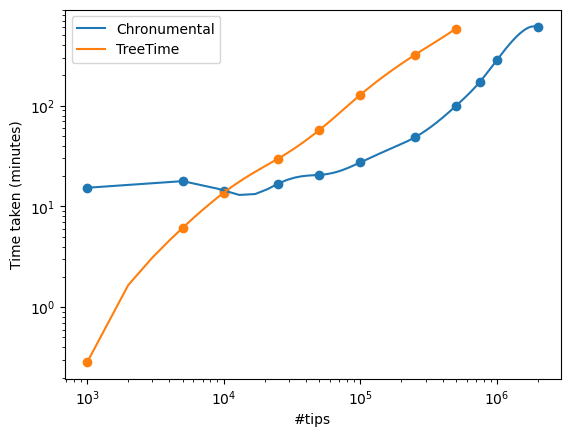

In [74]:
chronumental_datapoints = [('49882109', 15+20/60, 1),
                           ('50092706', 17+51/60, 5),
                           ('49259664', 14+16/60, 10),
                           ('49883055', 16+50/60, 25),
                           ('49259792', 20+33/60, 50),
                           ('49888139', 27+26/60, 100),
                           ('49921957', 48+29/60, 250),
                           ('49922369', 60+39+24/60, 500),
                           ('46593547', 2*60+52+42/60, 750),
                           ('50035490', 4*60+44+52/60,1000),
                           ('50035985', 10*60+40/60, 2000)]
chronumental = pd.DataFrame(data=chronumental_datapoints, columns=['id','duration','sample_size']).sort_values('sample_size')
graph([(chronumental, 'Chronumental'),(treetime, 'TreeTime')], save=True)